In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#readin the data file
df = pd.read_csv("salary_data_cleaned.csv")

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,same_state,age,python,excel,spark,aws,simplified_job,position_level,Rstudio
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,NM,0,47,1,1,0,0,data scientist,na,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,MD,0,36,1,0,0,0,data scientist,na,1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,FL,1,10,1,1,1,0,data scientist,na,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,WA,1,55,1,0,0,0,data scientist,na,1
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,NY,1,22,1,1,0,0,data scientist,na,1


In [4]:
pd.options.display.max_rows
pd.set_option('display.max_rows',None)

In [52]:
df.isnull().sum()

Job Title              0
Salary Estimate        0
Job Description        0
Rating                 0
Company Name           0
Location               0
Headquarters           0
Size                   0
Founded                0
Type of ownership      0
Industry               0
Sector                 0
Revenue                0
Competitors            0
hourly                 0
employer_provided      0
min_salary             0
max_salary             0
avg_salary             0
company_text           0
job_state              0
same_state             0
age                    0
python                 0
excel                  0
spark                  0
aws                    0
simplified_job       184
position_level         0
Rstudio                0
desc_len               0
num_of_comp            0
dtype: int64

In [136]:
df['simplified_job'].fillna(df['simplified_job'].mode()[0], inplace=True)

In [137]:
df['simplified_job'].unique()

array(['data scientist', 'analyst', 'data engineer', 'director',
       'manager', 'machine learning'], dtype=object)

In [79]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python', 'excel',
       'spark', 'aws', 'simplified_job', 'position_level', 'Rstudio',
       'desc_len', 'num_of_comp'],
      dtype='object')

In [144]:
df['position_level'].fillna(df['position_level'].mode()[0], inplace=True)

In [146]:
df['position_level'].unique()

array(['na', 'senior', 'jr'], dtype=object)

In [123]:
for column in df[['position_level'  ]]:
    mode = df[column].mode()
    df[column] = df[column].fillna(mode)

# Dealing with the missing Values

In [117]:
#removes outliers which are not in 3*IQR range
def remove_outliers(dataframe, column):
    sorted_col = sorted(dataframe[column])
    Q1,Q3 = np.percentile(sorted_col , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (3 * IQR)
    upper_range = Q3 + (3 * IQR)  
    print(lower_range)
    print(upper_range)
    dataframe_out = dataframe[(dataframe[column] > lower_range) & (dataframe[column] < upper_range)]
    return dataframe_out

In [118]:
data = remove_outliers(df, 'age')

<IPython.core.display.Javascript object>

-133.0
203.0


In [121]:
data["age"].unique()

array([ 47,  36,  10,  55,  22,  20,  12,  15,   6,  11,   9,  52,  58,
         8,  25, 105,   7,  85, 171,  68, 168,  23,  24,  46,  51, 150,
        35,  -1,   5,  27,  62,  34,  21,  95, 108,  18, 157,  81,   4,
       135,  14,  72,  17,  93,  42, 160,   3,  78,  30,  32,  19,  13,
        28,  26,  43,   1,  38,  83, 142,  54,  49,  77,  33,  75, 174,
       169,  44,  39,  50,  69,  53,  59,  56,  90, 103, 137, 133,  16,
       170, 118,  91,  73,  29,  31,  92, 145, 107,  48, 164,  37,  98,
       106,  40,  66, 190,  45, 121,  41, 131], dtype=int64)

In [122]:
data['age'].describe()

count    726.000000
mean      42.342975
std       45.983679
min       -1.000000
25%       10.000000
50%       24.000000
75%       55.000000
max      190.000000
Name: age, dtype: float64

In [5]:
#fixing the state of los Angeles (Los Angeles is not a state)
df.job_state.value_counts()

CA             151
MA             103
NY              72
VA              41
IL              40
MD              35
PA              33
TX              28
NC              21
WA              21
NJ              17
FL              16
OH              14
TN              13
DC              11
CO              11
WI              10
IN              10
UT              10
AZ               9
MO               9
AL               8
KY               6
MI               6
DE               6
GA               6
IA               5
CT               5
NE               4
LA               4
OR               4
KS               3
NM               3
ID               2
MN               2
SC               1
Los Angeles      1
RI               1
Name: job_state, dtype: int64

In [6]:
df["job_state"] = df.job_state.apply(lambda x : x.strip() if x.strip().lower()!= "los angeles" else 'CA')

In [7]:
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
IN     10
UT     10
AZ      9
MO      9
AL      8
KY      6
GA      6
MI      6
DE      6
CT      5
IA      5
NE      4
LA      4
OR      4
KS      3
NM      3
ID      2
MN      2
SC      1
RI      1
Name: job_state, dtype: int64

In [8]:
#fixing the job description length

df["desc_len"] = df["Job Description"].apply(lambda x: len(x))
df["desc_len"]

0       2536
1       4783
2       3461
3       3883
4       2728
5       3747
6       1786
7       3804
8       1538
9       4574
10      2757
11      3490
12      3934
13      4897
14      3731
15      1889
16      3639
17      4163
18      3512
19      4397
20      2918
21      6909
22      6408
23      2907
24      3760
25      3698
26      4420
27      4900
28      5015
29      3461
30      3883
31      3342
32      5045
33      2327
34      2161
35      1739
36      5000
37      3703
38      3555
39      1739
40      3053
41      1996
42      3833
43      3550
44      9120
45      3213
46      7286
47      3412
48      2682
49      2739
50      2915
51      4244
52      1629
53      4734
54      4448
55      3543
56      4203
57      5020
58      1786
59      3747
60      4804
61      1382
62      2933
63      4945
64      2493
65      1939
66      3081
67      8397
68      2306
69      2291
70      1886
71      2903
72      2653
73      4427
74      2609
75      4295
76      3405

In [9]:
#creating a nuew column for competitor count
df["num_of_comp"] = df["Competitors"].apply(lambda x: len(x.split(",")) if x!= '1' else 0 ) 

In [10]:
df["Competitors"]

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
5                      Digital Realty, CoreSite, Equinix
6                                                     -1
7                                                     -1
8                                                     -1
9                              Clicktripz, SmarterTravel
10                                                    -1
11                                                    -1
12                      Target, Costco Wholesale, Amazon
13                                                    -1
14                              Novartis, Baxter, Pfizer
15                                                    -1
16          bluebird bio, Agios Pharmaceuticals, Celgene
17                             

In [11]:
df["num_of_comp"]

0      1
1      1
2      1
3      3
4      3
5      3
6      1
7      1
8      1
9      2
10     1
11     1
12     3
13     1
14     3
15     1
16     3
17     1
18     1
19     1
20     3
21     1
22     1
23     1
24     3
25     1
26     1
27     1
28     1
29     1
30     3
31     1
32     1
33     1
34     3
35     1
36     1
37     1
38     1
39     1
40     3
41     1
42     1
43     3
44     3
45     1
46     3
47     1
48     3
49     3
50     1
51     3
52     1
53     3
54     1
55     1
56     3
57     2
58     1
59     3
60     1
61     1
62     1
63     3
64     3
65     1
66     1
67     4
68     1
69     1
70     1
71     1
72     1
73     3
74     3
75     1
76     1
77     1
78     1
79     3
80     1
81     1
82     3
83     3
84     1
85     1
86     3
87     1
88     1
89     1
90     1
91     3
92     1
93     1
94     1
95     3
96     3
97     3
98     3
99     1
100    1
101    3
102    3
103    3
104    3
105    1
106    3
107    1
108    3
109    3
110    2
1

In [12]:
#conversion of hourly salary to annual salary
df['min_salary'] = df.apply(lambda x :  x.min_salary*2 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x :  x.max_salary*2 if x.hourly == 1 else x.max_salary, axis = 1)
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [13]:
#removing the \ncharacter from the job title
df['company_text']= df.company_text.apply(lambda x : x.replace('\n', ""))

In [14]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python', 'excel',
       'spark', 'aws', 'simplified_job', 'position_level', 'Rstudio',
       'desc_len', 'num_of_comp'],
      dtype='object')

### HISTOGRAM

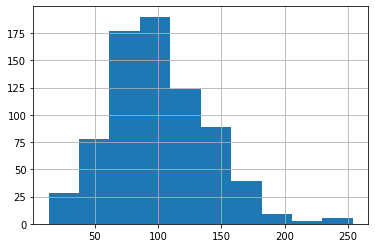

In [15]:
df.avg_salary.hist()

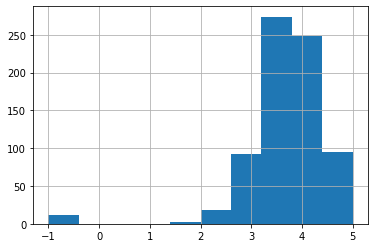

In [16]:
df.Rating.hist()

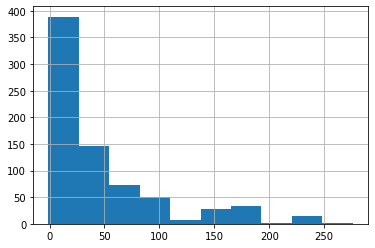

In [17]:
df.age.hist()

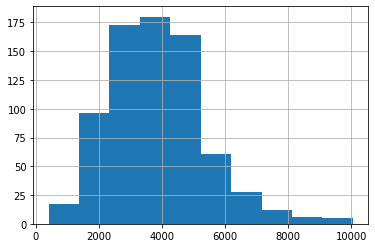

In [18]:
df.desc_len.hist()

# Box Plot

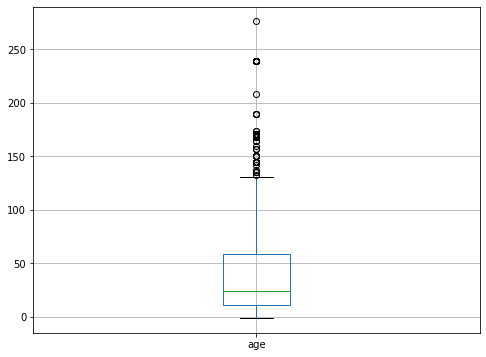

In [19]:
plt.figure(figsize=(8,6))
df.boxplot('age')

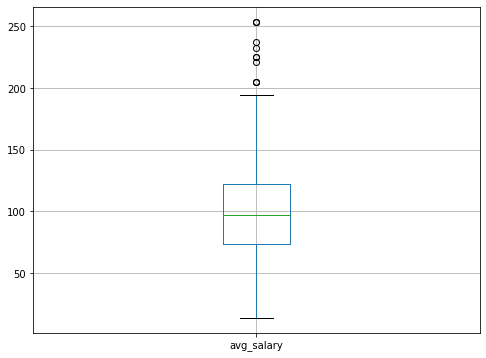

In [20]:
plt.figure(figsize=(8,6))
df.boxplot('avg_salary')

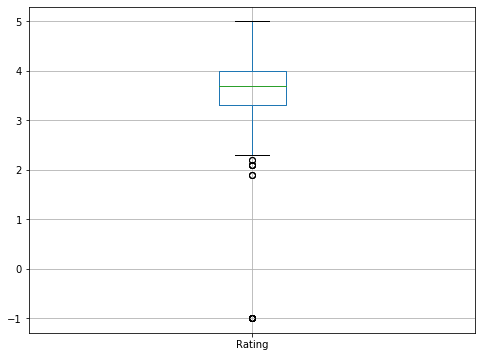

In [21]:
plt.figure(figsize=(8,6))
df.boxplot('Rating')

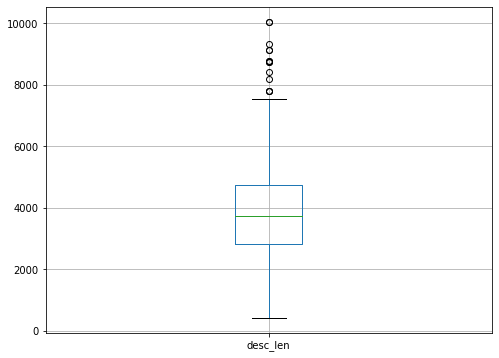

In [22]:
plt.figure(figsize=(8,6))
df.boxplot('desc_len')

# Correlation

In [23]:
corr = df[["age","avg_salary", "Rating", "desc_len","num_of_comp"]]


In [24]:
corr.head()

,age,avg_salary,Rating,desc_len,num_of_comp
0,47,72.0,3.8,2536,1
1,36,87.5,3.4,4783,1
2,10,85.0,4.8,3461,1
3,55,76.5,3.8,3883,3
4,22,114.5,2.9,2728,3


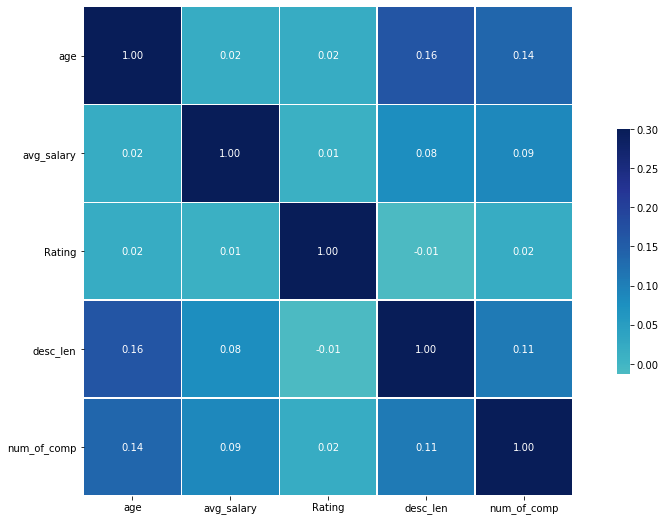

In [25]:
plt.figure(figsize=(16,9 ))
ax = sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_of_comp']].corr(),vmax=.3, center = 0,cmap="YlGnBu",square=True, linewidths=.5, annot= True,cbar_kws={"shrink": .5},fmt=".2f")
plt.yticks(rotation=0)
plt.show()

# Categorial Variables

In [26]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python', 'excel',
       'spark', 'aws', 'simplified_job', 'position_level', 'Rstudio',
       'desc_len', 'num_of_comp'],
      dtype='object')

In [27]:
cat = df[["Location",'Sector','Headquarters','Size','Type of ownership','Industry','Revenue',
     'company_text','job_state','same_state','python', 'excel',
       'spark', 'aws', 'simplified_job', 'position_level', 'Rstudio']]

graph for Location: total = 200


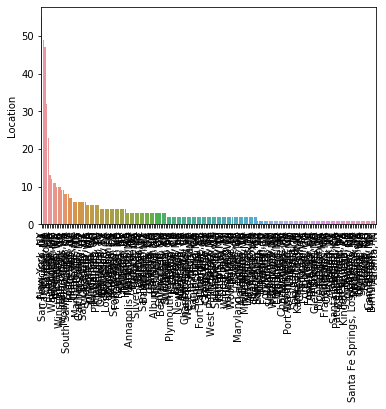

graph for Sector: total = 25


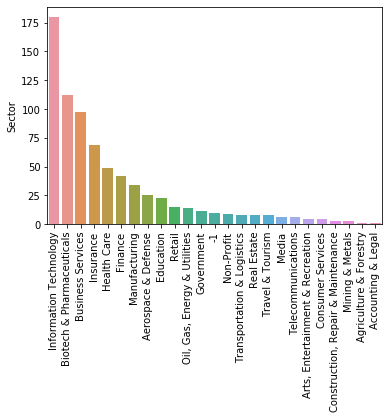

graph for Headquarters: total = 198


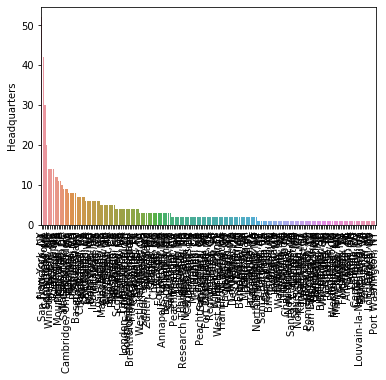

graph for Size: total = 9


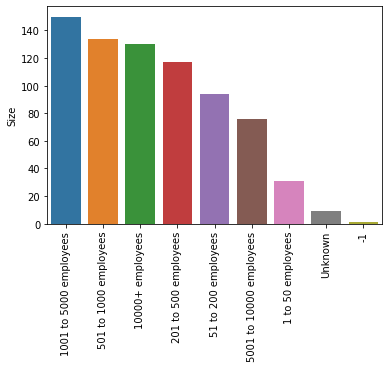

graph for Type of ownership: total = 11


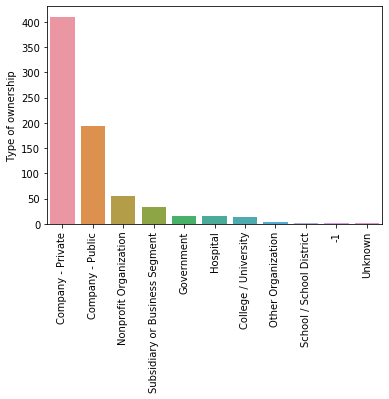

graph for Industry: total = 60


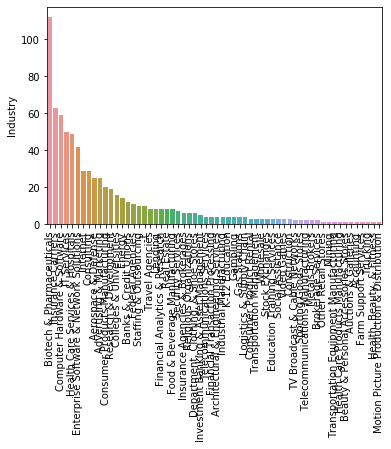

graph for Revenue: total = 14


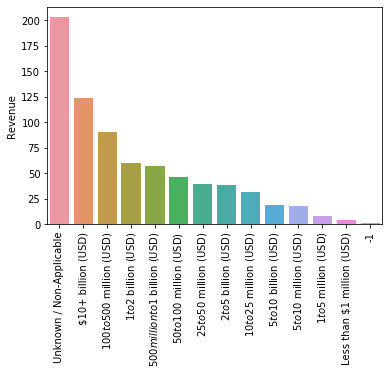

graph for company_text: total = 343


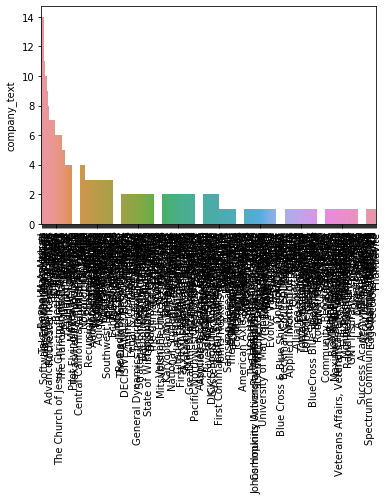

graph for job_state: total = 37


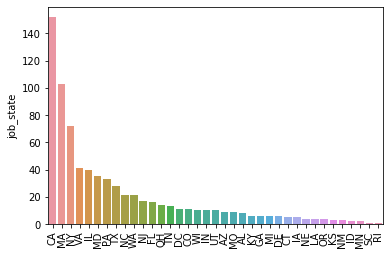

graph for same_state: total = 2


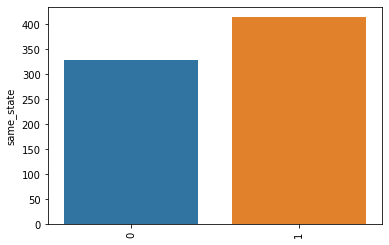

graph for python: total = 2


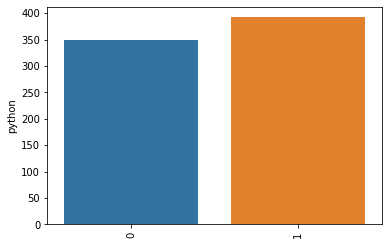

graph for excel: total = 2


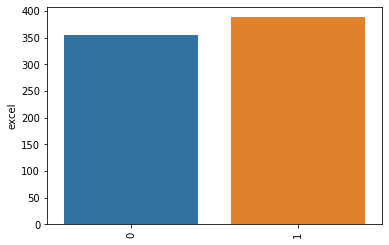

graph for spark: total = 2


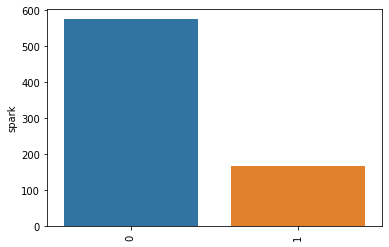

graph for aws: total = 2


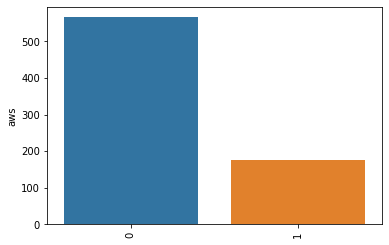

graph for simplified_job: total = 6


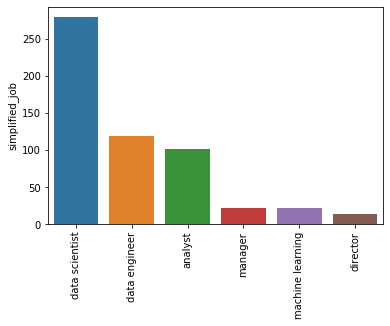

graph for position_level: total = 3


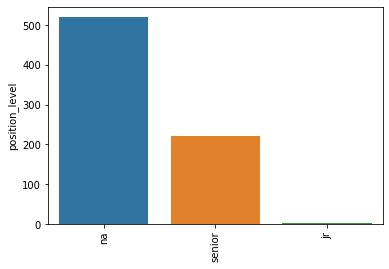

graph for Rstudio: total = 1


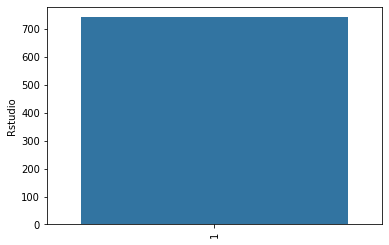

In [28]:
for i in cat.columns:
    cat_num = cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()


graph for Location: total = 20


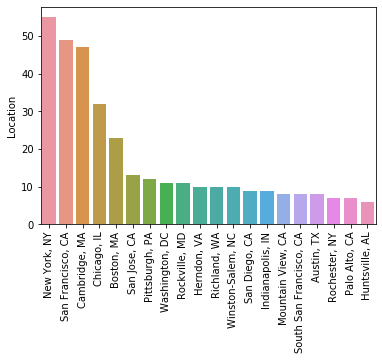

graph for Headquarters: total = 20


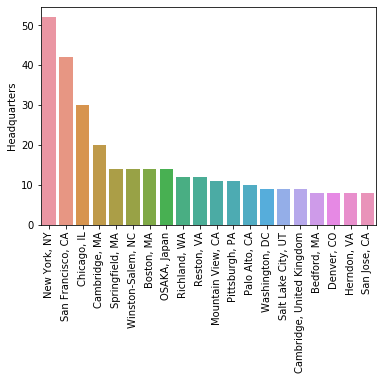

graph for company_text: total = 20


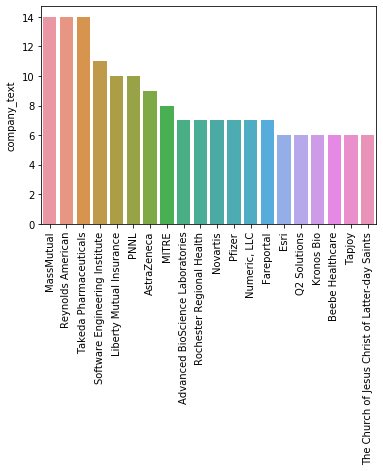

graph for Industry: total = 20


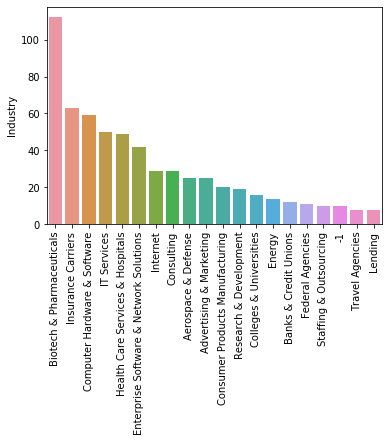

In [29]:
#more cleaner view
for i in cat[["Location", "Headquarters", "company_text", "Industry"]].columns:
    cat_num1 = cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num1)))
    chart = sns.barplot(x=cat_num1.index, y=cat_num1)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

    


graph for Location: total = 200


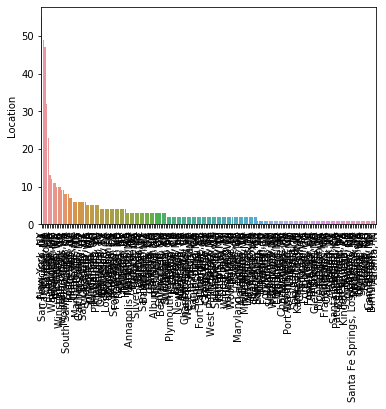

graph for Sector: total = 25


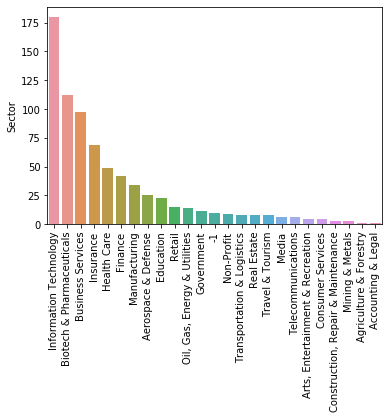

graph for Headquarters: total = 198


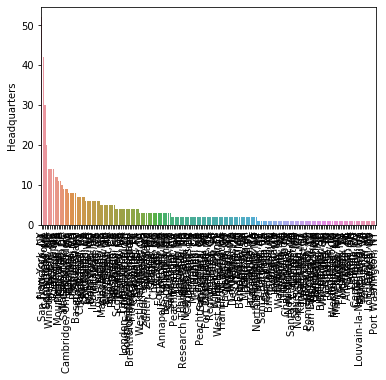

graph for Size: total = 9


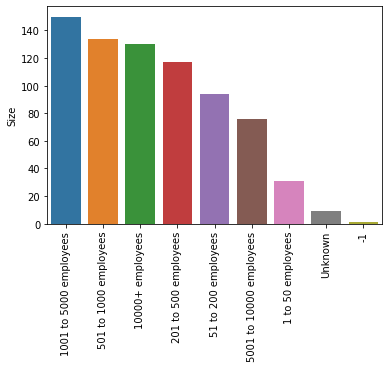

graph for Type of ownership: total = 11


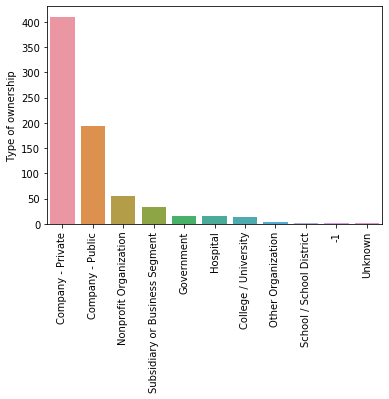

graph for Industry: total = 60


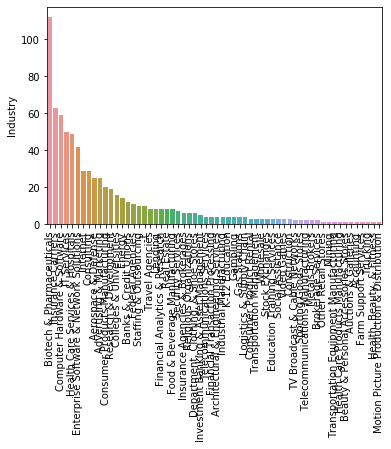

graph for Revenue: total = 14


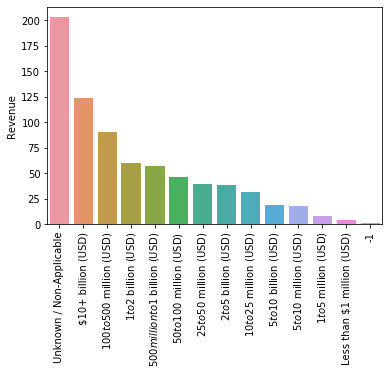

graph for company_text: total = 343


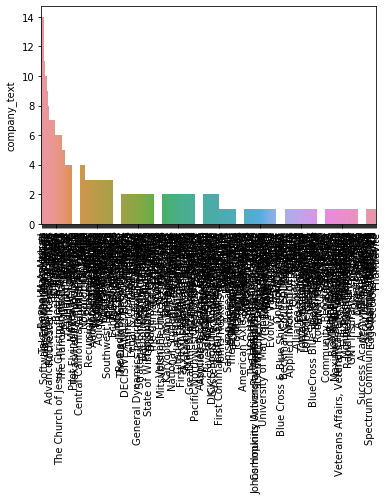

graph for job_state: total = 37


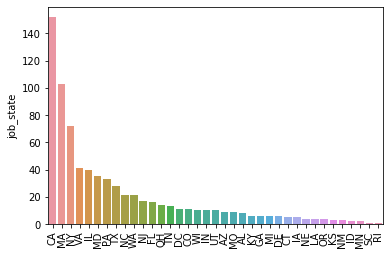

graph for same_state: total = 2


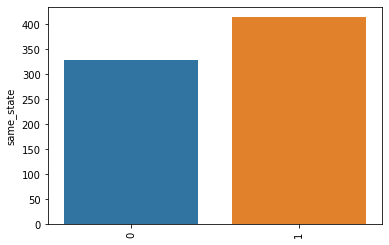

graph for python: total = 2


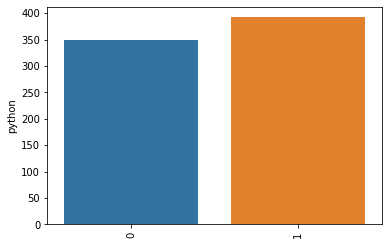

graph for excel: total = 2


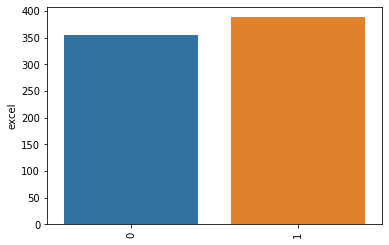

graph for spark: total = 2


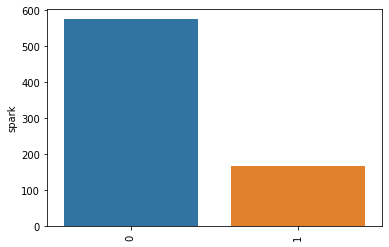

graph for aws: total = 2


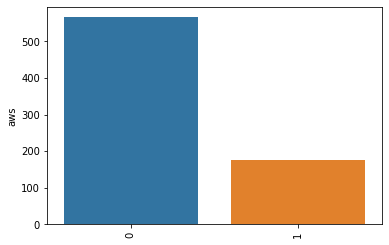

graph for simplified_job: total = 6


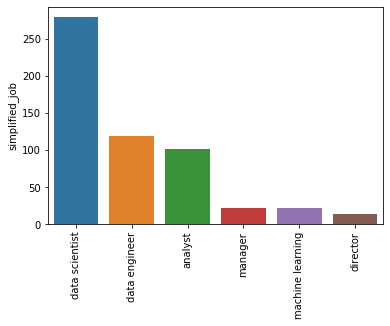

graph for position_level: total = 3


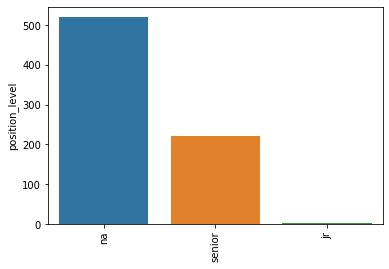

graph for Rstudio: total = 1


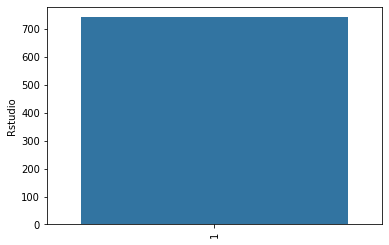

graph for Location: total = 20


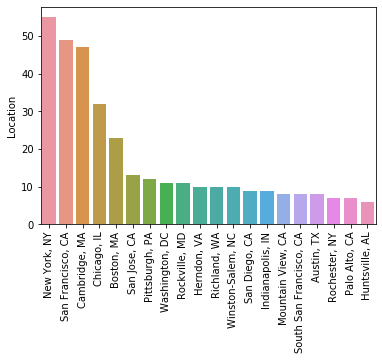

graph for Headquarters: total = 20


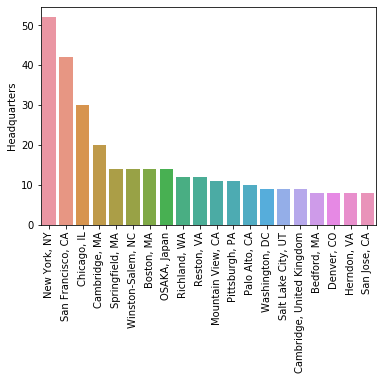

graph for company_text: total = 20


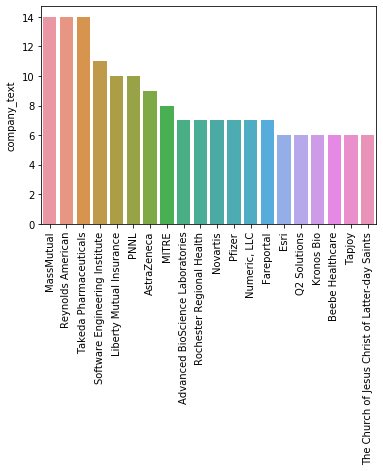

graph for Industry: total = 20


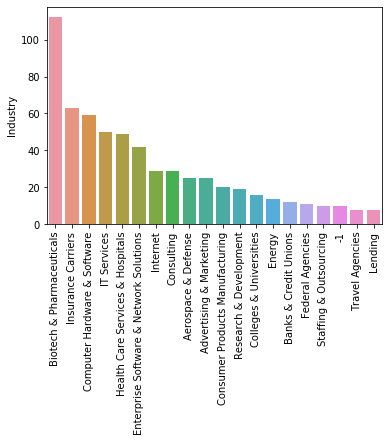

In [30]:
for i in cat.columns:
    cat_num = cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()
    
#more cleaner view
for i in cat[["Location", "Headquarters", "company_text", "Industry"]].columns:
    cat_num1 = cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num1)))
    chart = sns.barplot(x=cat_num1.index, y=cat_num1)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

    

# PIVOT TABLES
Pivot tables are useful for summarizing data

In [31]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python', 'excel',
       'spark', 'aws', 'simplified_job', 'position_level', 'Rstudio',
       'desc_len', 'num_of_comp'],
      dtype='object')

In [32]:
pd.pivot_table(df, index = ['simplified_job','position_level'], values = "avg_salary")

avg_salary
simplified_job   position_level            
analyst          jr               56.500000
                 na               61.155405
                 senior           79.092593
data engineer    na               96.701220
                 senior          124.689189
data scientist   jr              106.500000
                 na              107.043011
                 senior          138.956522
director         na              168.607143
machine learning na              119.133333
                 senior          142.071429
manager          na               84.022727

In [33]:
pd.pivot_table(df, index = ['job_state'], values = "avg_salary").sort_values('avg_salary',ascending = False)

,avg_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [34]:
pd.pivot_table(df, index = ['job_state','simplified_job'], values = "avg_salary", aggfunc = "count").sort_values('job_state',ascending = True)

avg_salary
job_state simplified_job              
AL        analyst                    5
          data engineer              1
AZ        analyst                    1
          data engineer              5
          data scientist             1
CA        analyst                   18
          data engineer             25
          data scientist            68
          machine learning           5
          manager                    9
CO        machine learning           1
          data scientist             3
          data engineer              3
          analyst                    1
CT        data scientist             2
DC        analyst                    2
          data engineer              4
          data scientist             5
FL        analyst                    6
          data engineer              3
          data scientist             7
GA        data scientist             3
IA        data engineer              3
          analyst                    2
ID        analyst                    2
IL        analyst                    3
          data engineer              8
          data scientist            15
          director                   6
          machine learning           2
IN        data engineer              4
          data scientist             2
KS        machine learning           3
KY        data scientist             2
LA        data engineer              2
          analyst                    1
MA        analyst                    4
          data engineer             12
          data scientist            30
          director                   6
          manager                    5
MD        analyst                    3
          data engineer              3
          data scientist            13
MI        manager                    2
          data scientist             4
MN        analyst                    1
          data engineer              1
MO        analyst                    2
          data scientist             3
          manager                    1
NC        data engineer              6
          data scientist             3
NJ        director                   2
          data scientist             4
          manager                    2
          analyst                    6
          data engineer              2
NM        data scientist             3
NY        analyst                   14
          data engineer              4
          data scientist            40
          machine learning           2
OH        analyst                    4
          data scientist             7
OR        data engineer              1
          data scientist             3
PA        manager                    3
          machine learning           7
          analyst                    8
          data engineer              1
          data scientist             6
RI        analyst                    1
TN        analyst                    2
          data engineer             10
          data scientist             1
TX        data engineer              8
          data scientist            13
UT        data scientist             3
          data engineer              3
          analyst                    4
VA        analyst                    6
          data engineer             10
          data scientist            18
          machine learning           2
WA        analyst                    3
          data scientist            17
WI        analyst                    3
          data scientist             3

In [35]:
pd.pivot_table(df[df.simplified_job == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [36]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'job_state', 'same_state', 'age', 'python', 'excel',
       'spark', 'aws', 'simplified_job', 'position_level', 'Rstudio',
       'desc_len', 'num_of_comp'],
      dtype='object')

In [37]:
pd.pivot_table(df, index = ['Rating'], values = "avg_salary").sort_values('Rating',ascending = True)

,avg_salary
Rating,
-1.0,136.181818
1.9,87.500000
2.1,95.900000
2.2,97.750000
2.3,81.500000
2.4,60.214286
2.5,120.000000
2.6,109.083333
2.7,83.250000


In [38]:
pd.pivot_table(df, index = ['Revenue'], values = "avg_salary")

,avg_salary
Revenue,
$1 to $2 billion (USD),104.533333
$1 to $5 million (USD),119.312500
$10 to $25 million (USD),100.359375
$10+ billion (USD),115.165323
$100 to $500 million (USD),83.153846
$2 to $5 billion (USD),94.730769
$25 to $50 million (USD),82.837500
$5 to $10 billion (USD),94.184211
$5 to $10 million (USD),126.111111


In [39]:
pd.pivot_table(df, index = ['Sector'], values = "avg_salary")

,avg_salary
Sector,
-1,114.650000
Accounting & Legal,113.500000
Aerospace & Defense,99.060000
Agriculture & Forestry,80.500000
"Arts, Entertainment & Recreation",48.500000
Biotech & Pharmaceuticals,111.767857
Business Services,97.701031
"Construction, Repair & Maintenance",26.500000
Consumer Services,99.875000


In [40]:
pd.pivot_table(df, index = ['hourly'], values = "avg_salary")

,avg_salary
hourly,
0,103.1539
1,25.0000


In [41]:
pd.pivot_table(df, index = ['employer_provided'], values = "avg_salary")

,avg_salary
employer_provided,
0,100.172414
1,119.970588


In [42]:
pd.pivot_table(df, index = ['python'], values = "avg_salary")

,avg_salary
python,
0,87.155714
1,112.653061


In [43]:
pd.pivot_table(df, index = ['aws'], values = "avg_salary")

,avg_salary
aws,
0,96.915194
1,112.559659


In [44]:
pd.pivot_table(df, index = ['excel'], values = "avg_salary")

,avg_salary
excel,
0,102.953390
1,98.502577


In [45]:
pd.pivot_table(df, index = ['Rstudio'], values = "avg_salary")

,avg_salary
Rstudio,
1,100.626011


In [46]:
pd.pivot_table(df, index = ['spark'], values = "avg_salary")

,avg_salary
spark,
0,96.931304
1,113.347305


In [47]:
pd.pivot_table(df, index = ['Type of ownership'], values = "avg_salary")

,avg_salary
Type of ownership,
-1,117.500000
College / University,107.615385
Company - Private,101.776829
Company - Public,110.893782
Government,84.300000
Hospital,54.000000
Nonprofit Organization,68.281818
Other Organization,77.500000
School / School District,77.750000


In [48]:
pd.pivot_table(df, index = ['Industry'], values = "avg_salary")

,avg_salary
Industry,
-1,114.650000
Accounting,113.500000
Advertising & Marketing,104.300000
Aerospace & Defense,99.060000
Architectural & Engineering Services,50.500000
Auctions & Galleries,128.000000
Banks & Credit Unions,70.625000
Beauty & Personal Accessories Stores,85.500000
Biotech & Pharmaceuticals,111.767857


In [49]:
pd.pivot_table(df, index = 'Revenue', columns = 'python', values = 'avg_salary', aggfunc = 'count')

python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [50]:
pd.pivot_table(df, index = 'Revenue', columns = 'Rstudio', values = 'avg_salary', aggfunc = 'count')

Rstudio,1
Revenue,
$1 to $2 billion (USD),60
$1 to $5 million (USD),8
$10 to $25 million (USD),32
$10+ billion (USD),124
$100 to $500 million (USD),91
$2 to $5 billion (USD),39
$25 to $50 million (USD),40
$5 to $10 billion (USD),19
$5 to $10 million (USD),18


In [51]:
pd.pivot_table(df, index = 'Revenue', columns = 'aws', values = 'avg_salary', aggfunc = 'count')

aws,0,1
Revenue,,
$1 to $2 billion (USD),49.0,11.0
$1 to $5 million (USD),3.0,5.0
$10 to $25 million (USD),27.0,5.0
$10+ billion (USD),98.0,26.0
$100 to $500 million (USD),78.0,13.0
$2 to $5 billion (USD),34.0,5.0
$25 to $50 million (USD),26.0,14.0
$5 to $10 billion (USD),16.0,3.0
$5 to $10 million (USD),9.0,9.0
